In [1]:
try:
  %tensorflow_version 2.x
except Exception:
  pass

import os
# listar el sistema de archivos
import glob
import pandas as pd
from keras.preprocessing.image import ImageDataGenerator
from keras import callbacks
from keras.utils.vis_utils import plot_model
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras.layers import Dense, Flatten, Dropout
from tensorflow.keras import Model

#tf.random.set_seed(2019)
(x,y), (x_test, y_test) = tf.keras.datasets.cifar10.load_data()

Using TensorFlow backend.


In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

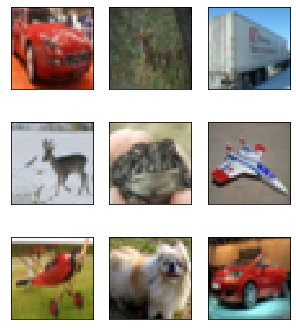

In [3]:
x_train = x
y_train = y
plt.figure(figsize=(5, 6))
for i in range(1, 10):
    plt.subplot(330 + i)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(x_train[5 * i], cmap='Greys')

In [4]:
x_Train, x_Test = x_train / 255.0, x_test / 255.0

In [5]:
def grayscale(data, dtype='float32'):
    # luma coding weighted average in video systems
    r, g, b = np.asarray(.3, dtype=dtype), np.asarray(.59, dtype=dtype), np.asarray(.11, dtype=dtype)
    rst = r * data[:, :, :, 0] + g * data[:, :, :, 1] + b * data[:, :, :, 2]
    # add channel dimension
    rst = np.expand_dims(rst, axis=3)
    return rst

In [6]:
x_train = grayscale(x_Train)
x_test = grayscale(x_Test)

In [7]:
# Se crea una instancia del modelo
base_model = tf.keras.applications.MobileNet(weights= None, include_top=False, input_shape=(32,32,1))
# se imprime la arquitectura del modelo
base_model.summary()

Model: "mobilenet_1.00_32"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 32, 32, 1)]       0         
_________________________________________________________________
conv1_pad (ZeroPadding2D)    (None, 33, 33, 1)         0         
_________________________________________________________________
conv1 (Conv2D)               (None, 16, 16, 32)        288       
_________________________________________________________________
conv1_bn (BatchNormalization (None, 16, 16, 32)        128       
_________________________________________________________________
conv1_relu (ReLU)            (None, 16, 16, 32)        0         
_________________________________________________________________
conv_dw_1 (DepthwiseConv2D)  (None, 16, 16, 32)        288       
_________________________________________________________________
conv_dw_1_bn (BatchNormaliza (None, 16, 16, 32)  

In [8]:
x = base_model.output
x = Flatten()(x)
x = Dense(512, activation= 'relu')(x)
x = Dropout(0.2)(x)
predictions = Dense(10, activation= 'softmax')(x)
model = Model(inputs = base_model.input, outputs = predictions)

In [9]:
model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 32, 32, 1)]       0         
_________________________________________________________________
conv1_pad (ZeroPadding2D)    (None, 33, 33, 1)         0         
_________________________________________________________________
conv1 (Conv2D)               (None, 16, 16, 32)        288       
_________________________________________________________________
conv1_bn (BatchNormalization (None, 16, 16, 32)        128       
_________________________________________________________________
conv1_relu (ReLU)            (None, 16, 16, 32)        0         
_________________________________________________________________
conv_dw_1 (DepthwiseConv2D)  (None, 16, 16, 32)        288       
_________________________________________________________________
conv_dw_1_bn (BatchNormaliza (None, 16, 16, 32)        128   

In [10]:
model.compile(optimizer='Adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [11]:
model.fit(x_train, y_train, batch_size = 32, epochs = 40)

W1128 22:29:39.201639  9700 deprecation.py:323] From C:\Users\Francisco\AppData\Local\Continuum\anaconda3\envs\clasep3.6\lib\site-packages\tensorflow\python\ops\math_grad.py:1250: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Train on 50000 samples
Epoch 1/40
50000/50000 [==============================] - 92s 2ms/sample - loss: 1.9543 - accuracy: 0.2721
Epoch 2/40
50000/50000 [==============================] - 92s 2ms/sample - loss: 1.6520 - accuracy: 0.3957
Epoch 3/40
50000/50000 [==============================] - 91s 2ms/sample - loss: 1.4633 - accuracy: 0.4814
Epoch 4/40
50000/50000 [==============================] - 90s 2ms/sample - loss: 1.2981 - accuracy: 0.5493
Epoch 5/40
50000/50000 [==============================] - 90s 2ms/sample - loss: 1.1710 - accuracy: 0.5983
Epoch 6/40
50000/50000 [==============================] - 93s 2ms/sample - loss: 1.0613 - accuracy: 0.6378
Epoch 7/40
50000/50000 [==============================] - 95s 2ms/sample - loss: 0.9710 - accuracy: 0.6687
Epoch 8/40
50000/50000 [==============================] - 91s 2ms/sample - loss: 0.8905 - accuracy: 0.6988
Epoch 9/40
50000/50000 [==============================] - 91s 2ms/sample - loss: 0.8281 - accuracy: 0.7217
Epoch 10/40
50

In [12]:
model.evaluate(x_test, y_test, batch_size=64, verbose=1)

10000/10000 [==============================] - 3s 272us/sample - loss: 1.2140 - accuracy: 0.7177


[1.2139868213653564, 0.7177]

In [13]:
model.save_weights("cifar_weigths.hdf5")

In [17]:
model2 = Model(inputs = base_model.input, outputs = predictions)
model2.compile(optimizer='Adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [18]:
model.load_weights("cifar_weigths.hdf5", by_name=False)

In [19]:
model2.evaluate(x_test, y_test, batch_size=64, verbose=1)

10000/10000 [==============================] - 3s 255us/sample - loss: 1.2140 - accuracy: 0.7177


[1.2139868213653564, 0.7177]